In [18]:
from pennylane.optimize import AdamOptimizer,QNSPSAOptimizer,AdagradOptimizer
import pennylane as qml
from pennylane import numpy as np
import pandas as pd
import jax
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mse
from scipy.optimize import minimize
from IPython.display import clear_output
import random 
from pennylane.optimize import AdamOptimizer,QNSPSAOptimizer
from utils import *
from autoencoder import Autoencoder
import warnings
warnings.filterwarnings("ignore")
import os 

custom_palette =['#EABFCB','#C191A1','#A4508B','#5F0A87','#2F004F','#120021',]
range_qubit_autoencoder=list(range(1,8))
range_batches = [10,20,50,100]
seed=42
epochs=150
n=100
stepsize=.2
opt=AdamOptimizer(stepsize=.2)
X=np.random.rand(n)*2*np.pi




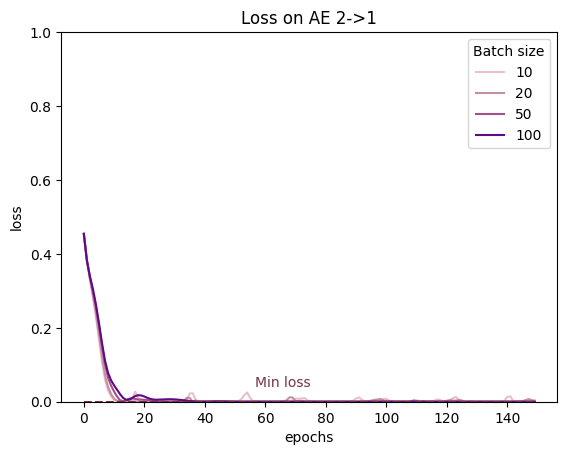

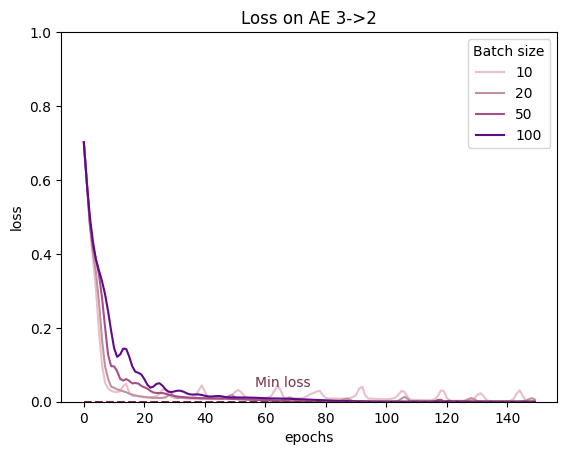

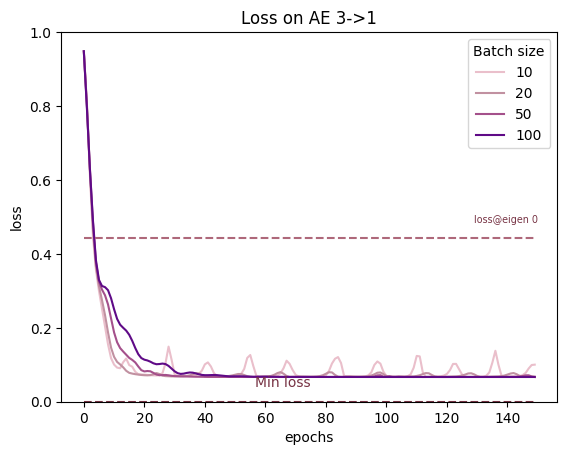

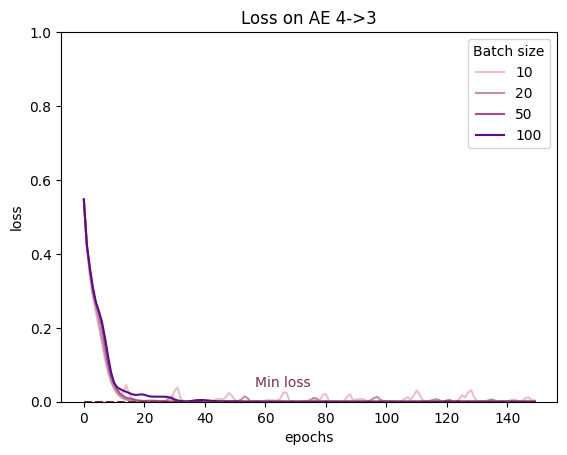

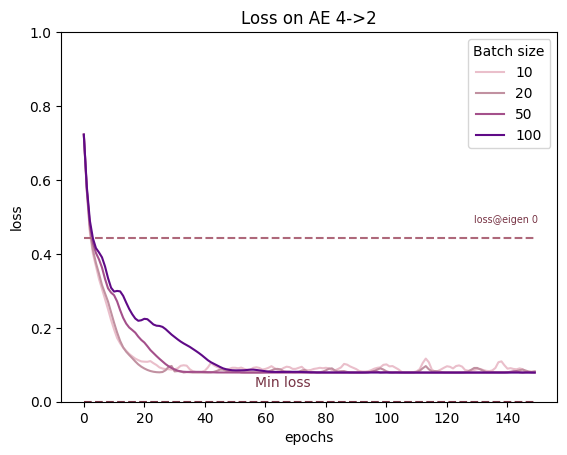

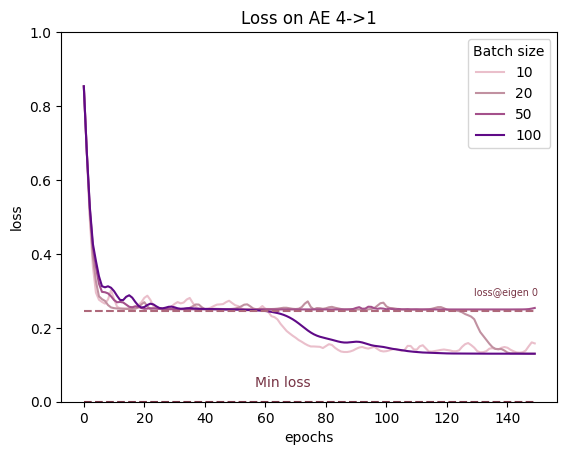

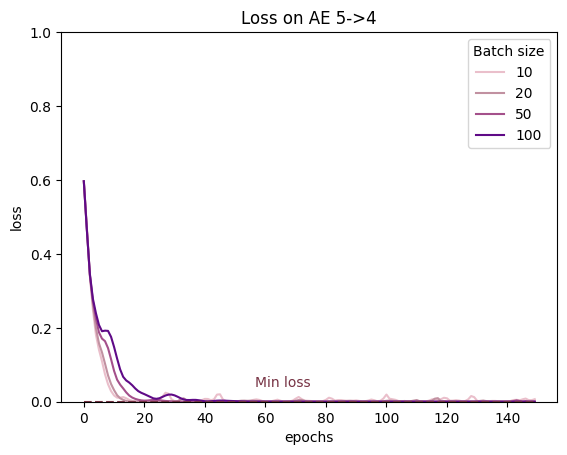

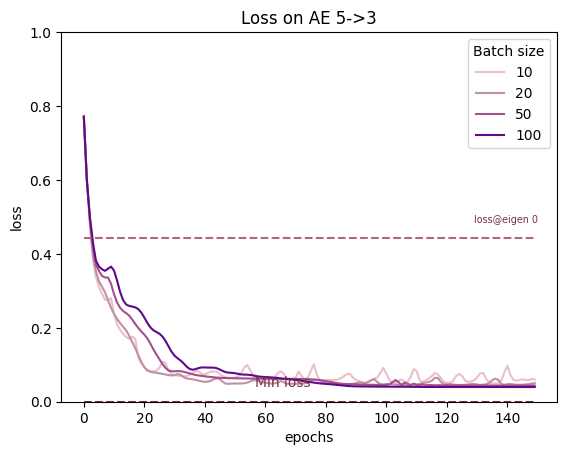

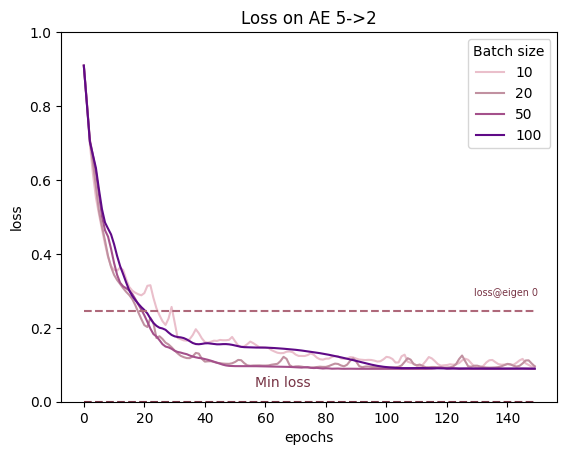

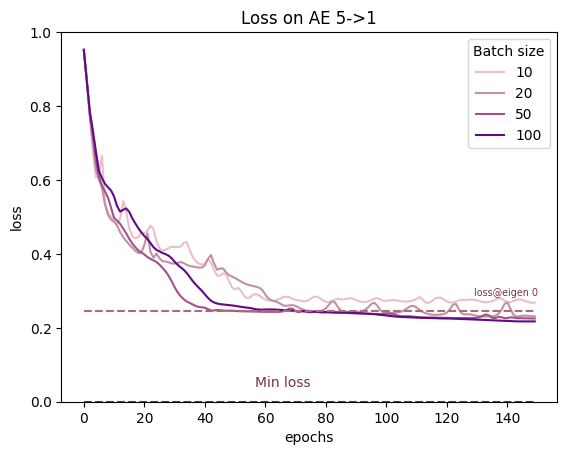

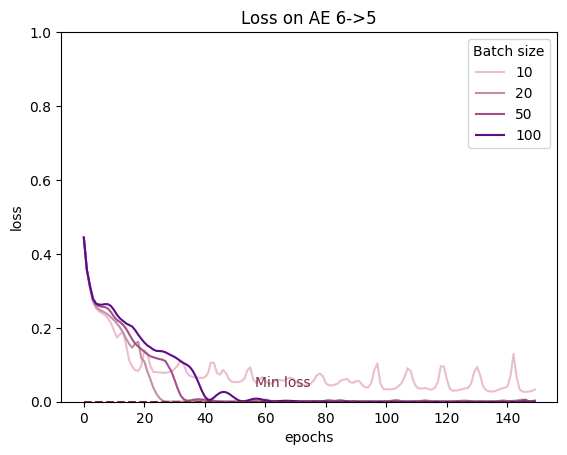

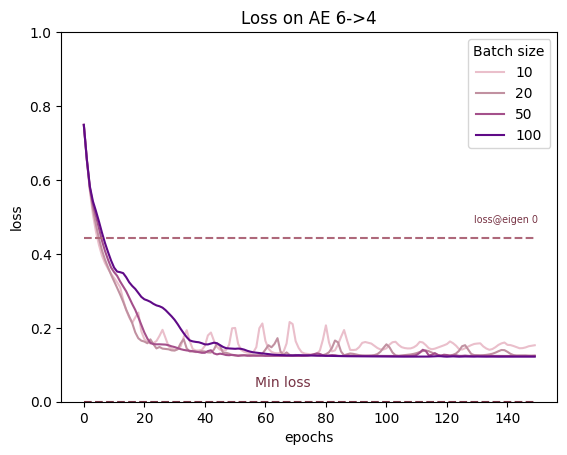

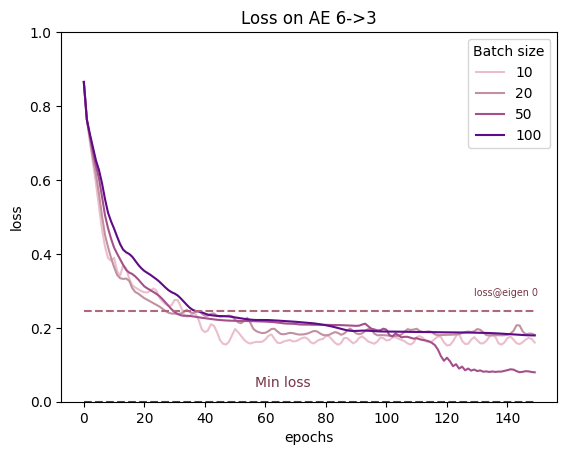

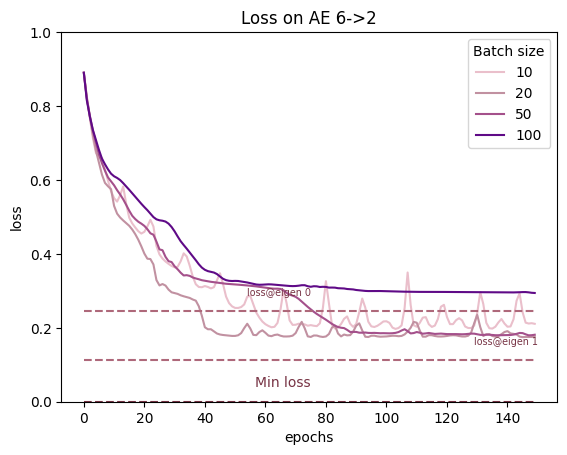

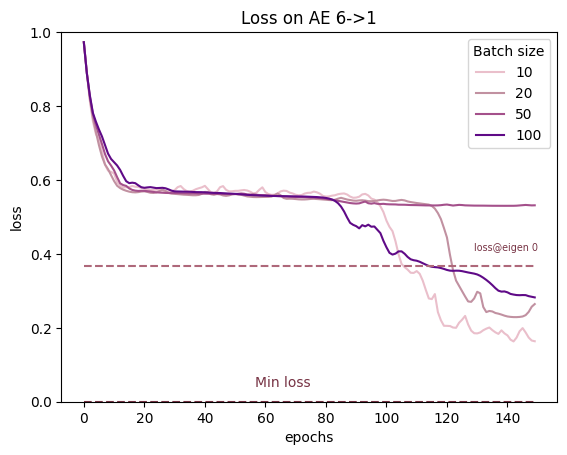

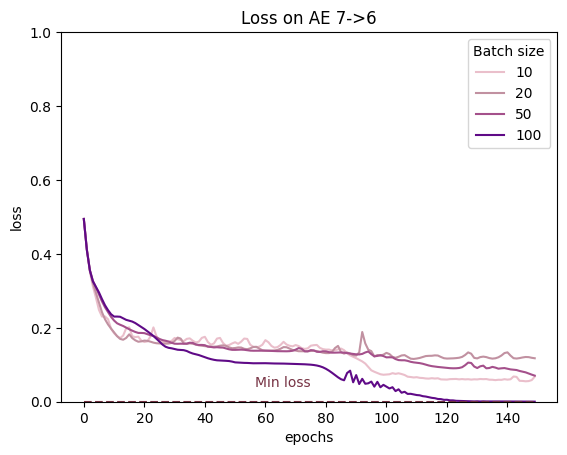

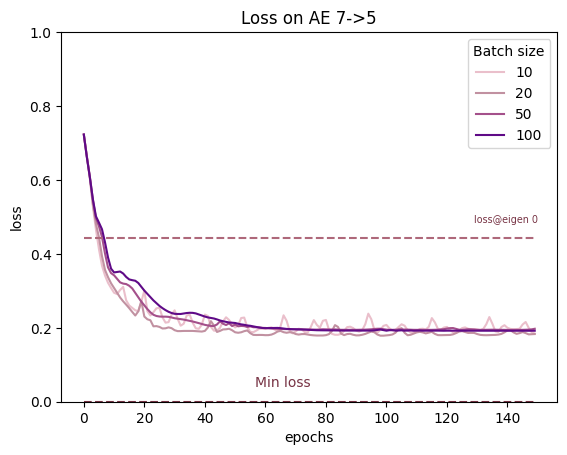

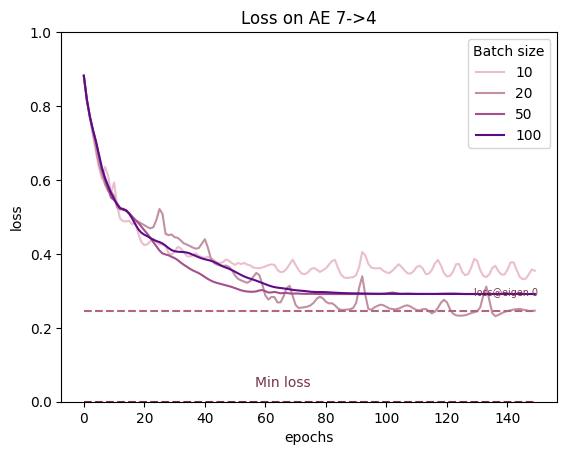

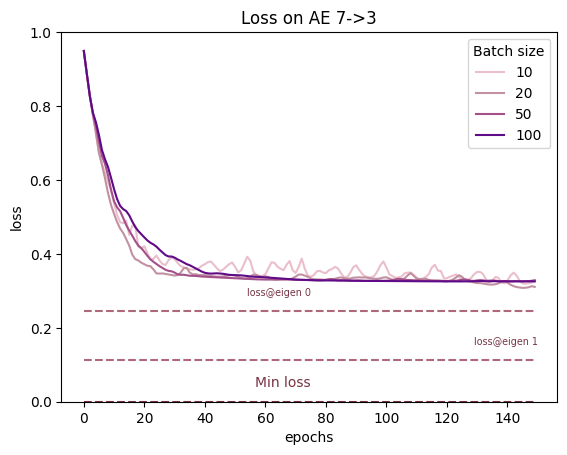

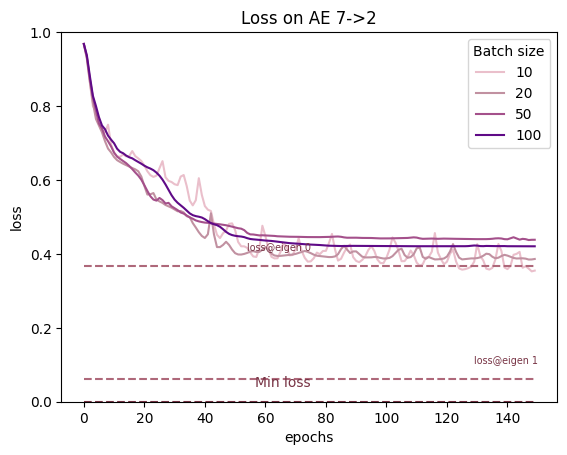

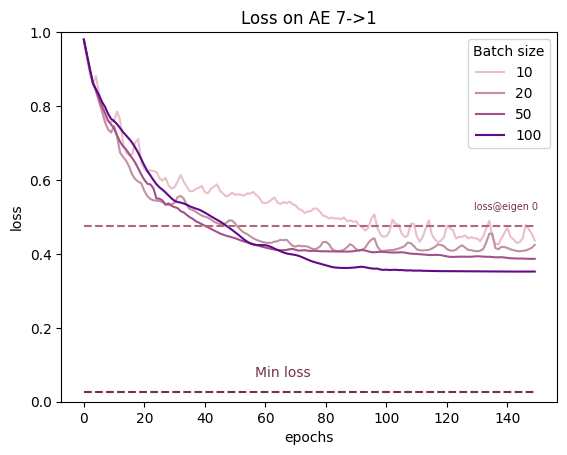

In [19]:
for n_qubit_autoencoder in range_qubit_autoencoder:
    for n_trash_qubit in range(1,n_qubit_autoencoder):
        img_folder=f'runs/run_{n_qubit_autoencoder}to{n_qubit_autoencoder-n_trash_qubit}'
        batch_losses={}
        for batch_size in range_batches:
            folder=img_folder+f'/{batch_size}'
            loss=np.load(folder+'/loss.npy')            
            batch_losses[batch_size]=loss

        min_found= {a:min(batch_losses[a]) for a in range_batches }
        min_loss =get_min_loss_fid(X,n_qubit_autoencoder,n_trash_qubit)
        eigen_loss =get_eigen_loss_values(X,n_qubit_autoencoder,n_trash_qubit)
        eigen_loss = delete_following_elements(eigen_loss,0.001)
        plt.figure()
        sns.set_palette(custom_palette)  
        for b,r in zip(list(batch_losses.values()),range_batches):
            sns.lineplot(x=range(epochs),y=b,label=r)
        plt.legend(title='Batch size')
        for i, a in enumerate(eigen_loss):
            plt.hlines(a,0,epochs-1,color='#AE687A',linestyle='--')
            plt.text(x=epochs//(len(eigen_loss))*i+epochs//(len(eigen_loss)), y=a+0.05, fontsize='x-small', s=f'loss@eigen {i}', color='#773344', ha='right', va='center')

        plt.hlines(min_loss,0,epochs-1,color='#773344',linestyle='--')
        plt.text(x=epochs//2, y=min_loss+0.05, fontsize='medium', s=f'Min loss', color='#773344', ha='right', va='center')
        plt.ylim((0,1))


        
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title(f'Loss on AE {n_qubit_autoencoder}->{n_qubit_autoencoder-n_trash_qubit}')
        plt.savefig(img_folder+f'/{n_qubit_autoencoder}_{n_qubit_autoencoder-n_trash_qubit}')
        # Info file 
        with open(img_folder+f'/info.txt','w') as file:
            file.write(f'RUN INFORMATION\nInput qubits={n_qubit_autoencoder}\nTrash qubit={n_trash_qubit}\nSeed={seed}\nOptimizer=AdamOptimizer(stepsize={opt.stepsize})\nEpochs={epochs}\nBatch sizes={range_batches}\nMin fidelity loss={min_loss}\nMin loss found=\n{''.join([f'\t\t\t\t{a}\t:\t{b}\n' for a, b in min_found.items()])}')